In [3]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import math
import numpy as np
from sklearn.datasets import make_friedman2
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

In [4]:
import sys
sys.path.append(r'C:\Users\JP\Documents\TU Berlin\Master\Code_RNN\Kan\Misc')
sys.path.append(r'C:\Users\JP\Documents\TU Berlin\Master\Code_RNN\Kan\Misc\Kan_NN.py')  
import Kan_NN
import importlib
importlib.reload(Kan_NN)

<module 'Kan_NN' from 'C:\\Users\\JP\\Documents\\TU Berlin\\Master\\Code_RNN\\Kan\\Misc\\Kan_NN.py'>

In [5]:
@torch.no_grad()
def compute_test_loss(test_loader, model):
    criterion = torch.nn.MSELoss()
    running_loss = 0.
    for batch, target in test_loader:
        outputs = model(batch)
        loss = criterion(target, outputs)
        running_loss += loss.item()
    return running_loss / len(test_loader)

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_friedman2

def get_loader(in_dim, noise, n_samples=20000):
    # Set the seed for reproducibility
    seed = 42
    np.random.seed(seed)
    torch.manual_seed(seed)
    

    # Generate the Friedman dataset
    X_train, y_train = make_friedman2(n_samples=int(n_samples * 0.8), random_state=seed, noise=noise)
    X_test, y_test = make_friedman2(n_samples=int(n_samples * 0.2), random_state=seed, noise=0.0)

    # Reshape targets to match expected input dimensions
    y_train = np.expand_dims(y_train, axis=1)
    y_test = np.expand_dims(y_test, axis=1)

    # Apply feature scaling (Standardization) ONLY to `X`
    scaler_X = StandardScaler()
    X_train = scaler_X.fit_transform(X_train)  # Fit and transform training data
    X_test = scaler_X.transform(X_test)        # Transform test data (using train stats)
    # Convert numpy arrays to PyTorch tensors
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32)  # Keep `y` unchanged
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32)    # Keep `y` unchanged

    # Create TensorDataset for train and test sets
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

    # Set batch size and create DataLoader for training and testing
    batch_size = 1024
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

    return train_loader, test_loader, scaler_X

In [7]:
import pickle
_,_, scaler_X = get_loader(4,1,20000)
with open('fried_2_scaler_X.pkl', 'wb') as f:
    pickle.dump(scaler_X, f)

4 2 [[64], 16]
Epoch [1/1000], Loss: 371147.451172, test: 367116.907085, lr: 0.001000
Epoch [2/1000], Loss: 369690.583984, test: 363385.279893, lr: 0.001000
Epoch [3/1000], Loss: 362247.357422, test: 353507.989330, lr: 0.001000
Epoch [4/1000], Loss: 347794.705078, test: 331548.940533, lr: 0.001000
Epoch [5/1000], Loss: 316732.517578, test: 290922.724328, lr: 0.001000
Epoch [6/1000], Loss: 265918.477539, test: 230028.967784, lr: 0.001000
Epoch [7/1000], Loss: 199411.485352, test: 162318.629492, lr: 0.001000
Epoch [8/1000], Loss: 138107.652344, test: 115235.400021, lr: 0.001000
Epoch [9/1000], Loss: 104717.801758, test: 96804.222318, lr: 0.001000
Epoch [10/1000], Loss: 90637.075195, test: 84974.237551, lr: 0.001000
Epoch [11/1000], Loss: 79530.155273, test: 74675.551067, lr: 0.001000
Epoch [12/1000], Loss: 70094.260742, test: 65750.150443, lr: 0.001000
Epoch [13/1000], Loss: 61382.793945, test: 57720.932110, lr: 0.001000
Epoch [14/1000], Loss: 53790.323486, test: 50362.287990, lr: 0.0010

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch [1000/1000], Loss: 4.520372, test: 1.133998, lr: 0.001000


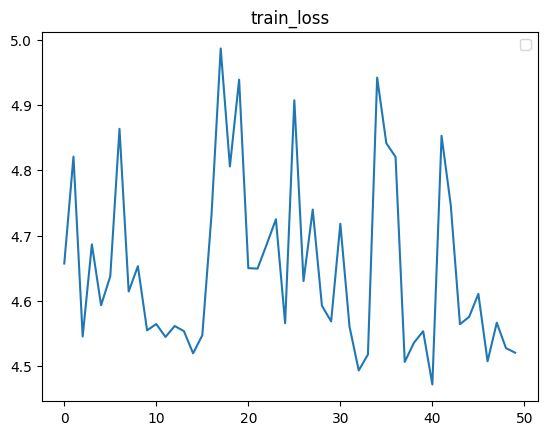

Training Complete!
4 5 [[64], 16]
Epoch [1/1000], Loss: 371187.990234, test: 367116.909019, lr: 0.001000
Epoch [2/1000], Loss: 369723.923828, test: 363385.247484, lr: 0.001000
Epoch [3/1000], Loss: 362282.148438, test: 353507.722281, lr: 0.001000
Epoch [4/1000], Loss: 347835.822266, test: 331548.227320, lr: 0.001000
Epoch [5/1000], Loss: 316764.861328, test: 290921.308208, lr: 0.001000
Epoch [6/1000], Loss: 265945.444336, test: 230026.682566, lr: 0.001000
Epoch [7/1000], Loss: 199432.142578, test: 162317.425746, lr: 0.001000
Epoch [8/1000], Loss: 138124.029785, test: 115239.510628, lr: 0.001000
Epoch [9/1000], Loss: 104734.229492, test: 96807.807592, lr: 0.001000
Epoch [10/1000], Loss: 90649.543945, test: 84978.289963, lr: 0.001000
Epoch [11/1000], Loss: 79541.489258, test: 74679.116050, lr: 0.001000
Epoch [12/1000], Loss: 70107.326416, test: 65753.059228, lr: 0.001000
Epoch [13/1000], Loss: 61395.479492, test: 57723.083059, lr: 0.001000
Epoch [14/1000], Loss: 53802.635986, test: 50363

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch [1000/1000], Loss: 26.143229, test: 1.418822, lr: 0.001000


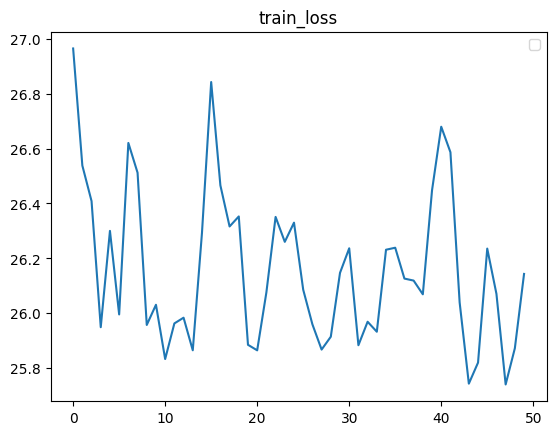

Training Complete!
4 2 [[16], 128]
Epoch [1/1000], Loss: 371882.697266, test: 367698.052191, lr: 0.001000
Epoch [2/1000], Loss: 369575.330078, test: 365835.987594, lr: 0.001000
Epoch [3/1000], Loss: 367075.291016, test: 361552.559477, lr: 0.001000
Epoch [4/1000], Loss: 360197.574219, test: 351976.756761, lr: 0.001000
Epoch [5/1000], Loss: 346281.751953, test: 332469.781422, lr: 0.001000
Epoch [6/1000], Loss: 319890.427734, test: 297769.634637, lr: 0.001000
Epoch [7/1000], Loss: 276691.137695, test: 245513.953365, lr: 0.001000
Epoch [8/1000], Loss: 217778.042969, test: 183513.136635, lr: 0.001000
Epoch [9/1000], Loss: 157937.178223, test: 131550.063473, lr: 0.001000
Epoch [10/1000], Loss: 117346.015625, test: 106045.624190, lr: 0.001000
Epoch [11/1000], Loss: 100043.146484, test: 94874.064606, lr: 0.001000
Epoch [12/1000], Loss: 89570.174805, test: 85307.794472, lr: 0.001000
Epoch [13/1000], Loss: 80875.958496, test: 76915.268408, lr: 0.001000
Epoch [14/1000], Loss: 72889.790527, test: 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch [1000/1000], Loss: 4.659184, test: 0.456229, lr: 0.001000


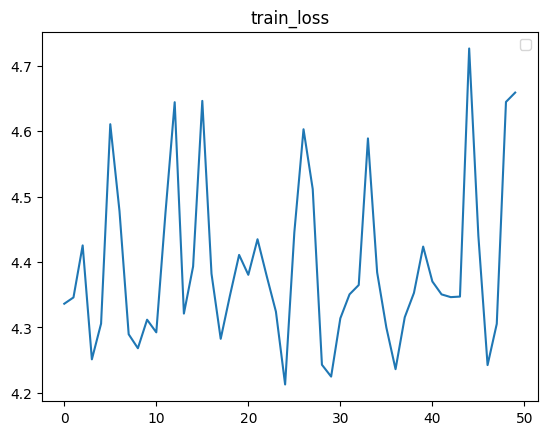

Training Complete!
4 5 [[16], 128]
Epoch [1/1000], Loss: 371920.658203, test: 367698.055000, lr: 0.001000
Epoch [2/1000], Loss: 369609.226562, test: 365836.003669, lr: 0.001000
Epoch [3/1000], Loss: 367109.201172, test: 361552.509524, lr: 0.001000
Epoch [4/1000], Loss: 360229.722656, test: 351976.651495, lr: 0.001000
Epoch [5/1000], Loss: 346314.763672, test: 332471.193796, lr: 0.001000
Epoch [6/1000], Loss: 319925.986328, test: 297771.270021, lr: 0.001000
Epoch [7/1000], Loss: 276721.815430, test: 245519.718670, lr: 0.001000
Epoch [8/1000], Loss: 217810.149414, test: 183521.642962, lr: 0.001000
Epoch [9/1000], Loss: 157964.694824, test: 131552.928018, lr: 0.001000
Epoch [10/1000], Loss: 117360.005859, test: 106048.292475, lr: 0.001000
Epoch [11/1000], Loss: 100061.639160, test: 94879.031364, lr: 0.001000
Epoch [12/1000], Loss: 89585.207031, test: 85309.371868, lr: 0.001000
Epoch [13/1000], Loss: 80884.514160, test: 76911.250156, lr: 0.001000
Epoch [14/1000], Loss: 72892.243652, test: 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch [1000/1000], Loss: 25.328241, test: 1.288880, lr: 0.001000


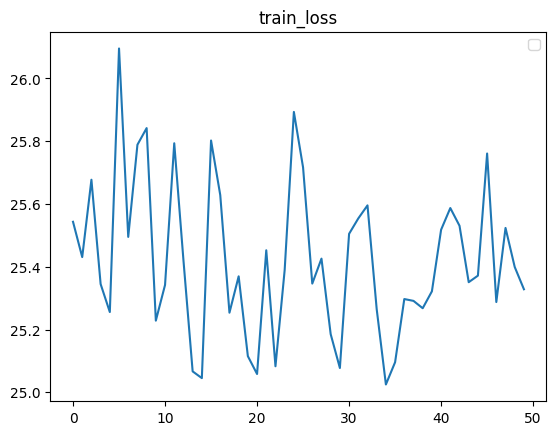

Training Complete!


In [ ]:
import time
import dill
n_samples = 20000
epochs = 1000
widths = [[[64], 16], [[16], 128]]
in_dims = [4]
noises = [2,5]
train_losses = []
test_losses = []
for width in widths:
    for in_dim in in_dims:
        for noise in noises:
            print(in_dim, noise, width)
            #shape = [in_dim, width[0][0], 1]
            shape = [in_dim,width[1], 1]
            train_loader, test_loader,_ = get_loader(in_dim, noise,n_samples)
            model = Kan_NN.Neural_Kan(shape = shape, h = width[0])
            model.train()
            optimizer = optim.AdamW(model.parameters(), lr=0.001)
            criterion = torch.nn.MSELoss()
            for epoch in range(epochs):
                running_loss = 0.0 
                for batch, target in train_loader:
                    start_time = time.time()
                    optimizer.zero_grad()
                    outputs = model(batch)
                    loss = criterion(target, outputs)
                    loss.backward()
                    optimizer.step()
                    running_loss += loss.item()
                avg_loss = running_loss / len(train_loader)
                model.train_loss.append(avg_loss)
                test_l = compute_test_loss(test_loader, model)
                model.test_loss.append(test_l)
                print(f"Epoch [{epoch + 1}/{epochs}], Loss: {avg_loss:.6f}, test: {test_l:.6f}, lr: {optimizer.param_groups[0]['lr']:6f}")
            plt.plot(model.train_loss[-50:])
            plt.title(f'train_loss')
            plt.legend()
            plt.show()
            print("Training Complete!")
            with open(f"models/Friedmann_2_KAN_{width}_{noise}_{in_dim}.dill", "wb") as f:
                dill.dump(model, f)
            #with open(f"models/KAN_{width[0]}_{noise}_{in_dim}.dill", "wb") as f:
            #    dill.dump(model, f)

